<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load the health insurance dataset and check the first five observations

In [2]:
df = pd.read_csv('health_insurance.csv')

In [3]:
df

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

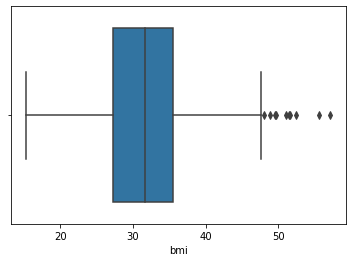

In [4]:
sns.boxplot(df['bmi'])
plt.show()

From the plot it is evident that outliers are present in the bmi variable. Outliers are present beyond the upper whisker.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

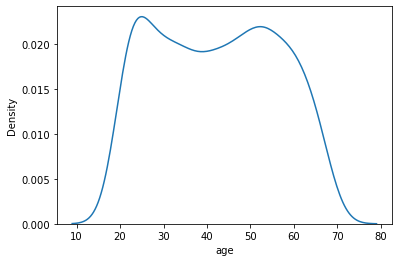

In [5]:
sns.distplot(df['age'], hist = False)
plt.show()

In [6]:
df['age'].skew()

0.04359793424360781

The variable age is not skewed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

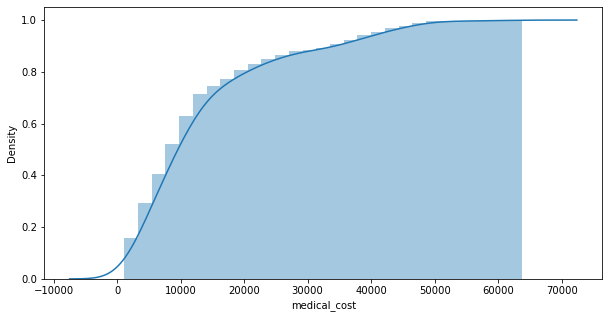

In [7]:
plt.figure(figsize = (10,5))
sns.distplot(df['medical_cost'], hist_kws = dict(cumulative = True), kde_kws = dict(cumulative = True))
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

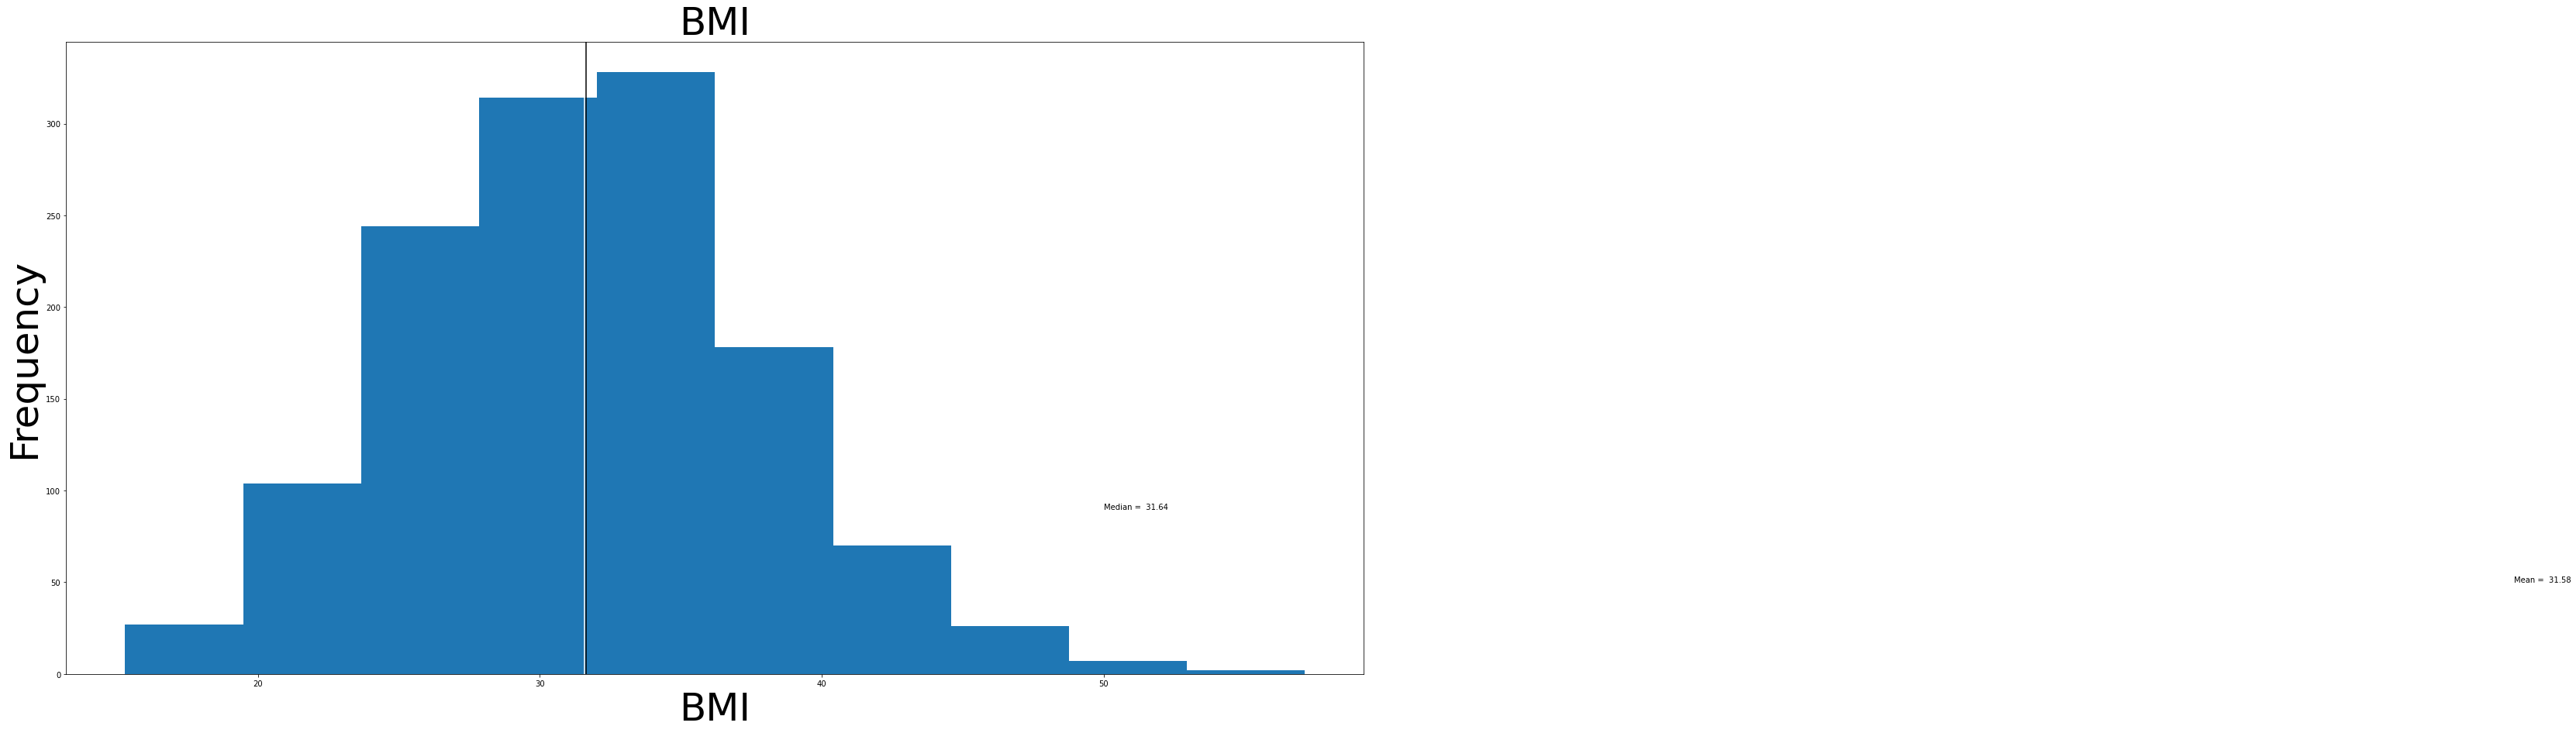

In [8]:
plt.figure(figsize = (30,15))

plt.hist(df['bmi'])

plt.axvline(df['bmi'].mean(), color = 'white')

plt.axvline(df['bmi'].median(), color = 'black')

plt.text(x= 100, y = 50, s='Mean = ' + ' ' + str(round(df['bmi'].mean(), 2)))

plt.text(x= 50, y = 90, s='Median = ' + ' ' + str(round(df['bmi'].median(), 2)))

plt.title('BMI', fontsize = 50)

plt.xlabel('BMI', fontsize = 50)

plt.ylabel('Frequency', fontsize = 50)

plt.show()

Here, the mean and median are nearly equal. The data is symmetric and normally distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost'>

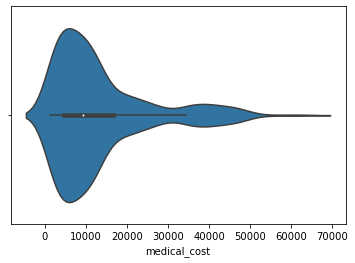

In [9]:
sns.violinplot(df['medical_cost'])

<AxesSubplot:xlabel='medical_cost', ylabel='Density'>

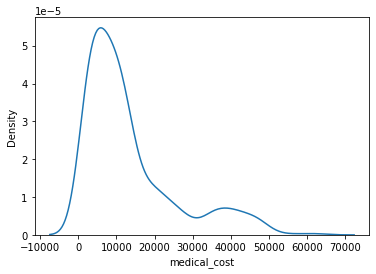

In [10]:
sns.distplot(df['medical_cost'], hist = False)

The distribution is right skewed.

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df[(df['age'] < 30) & (df['medical_cost'] > 40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost', ylabel='bmi'>

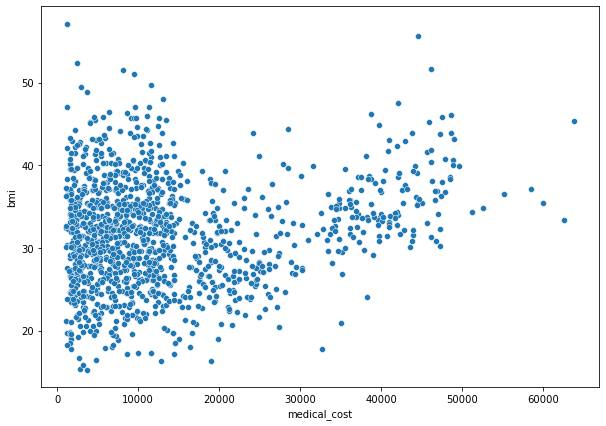

In [12]:
plt.figure(figsize = (10,7))

sns.scatterplot( x = 'medical_cost', y='bmi', data = df)

Seeing the scatterplot we can say that there are extreme values present, medical cost is more than 50k

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
mu = df.groupby(['gender'])['bmi'].mean()
mu

gender
F    31.825989
M    31.331477
Name: bmi, dtype: float64

In [14]:
std_dev = df.groupby(['gender'])['bmi'].std()
std_dev

gender
F    6.403398
M    6.303368
Name: bmi, dtype: float64

In [15]:
cv = (std_dev/mu) *100
cv

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64

The coefficient of variation of female is approx equal to male.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
pd.crosstab(df['gender'],df['region'], margins = True)

region,northeast,northwest,southeast,southwest,All
gender,,,,,
F,174,149,178,156,657
M,141,166,178,158,643
All,315,315,356,314,1300


The southeast region has the highest number of males.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

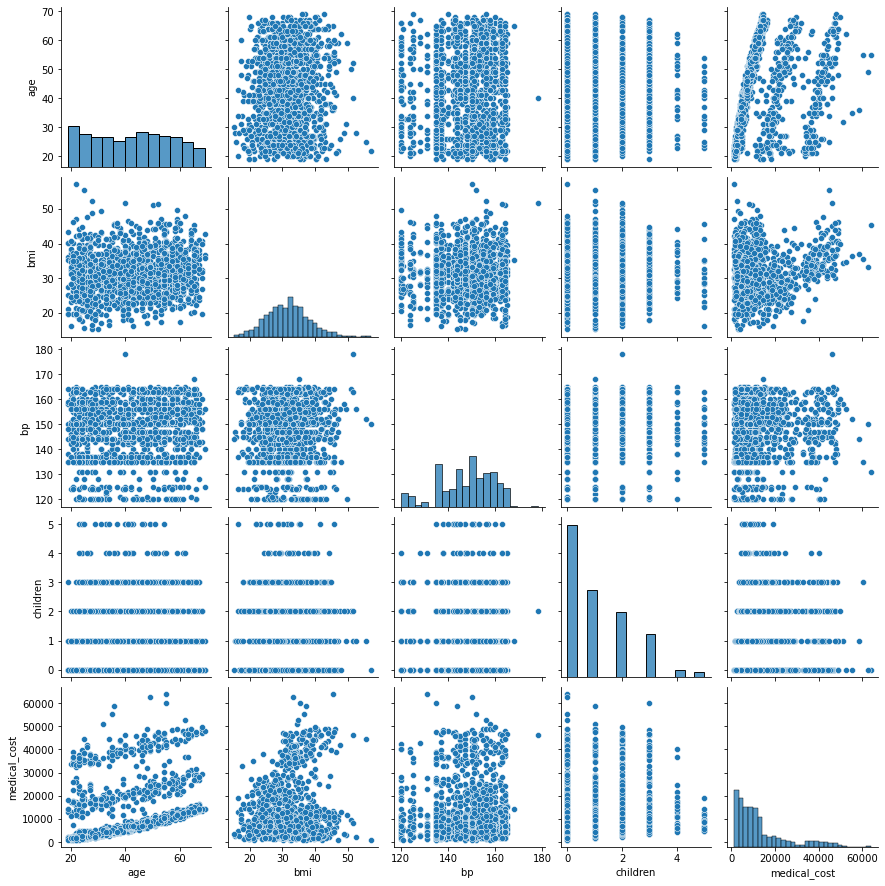

In [19]:
sns.pairplot(df)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

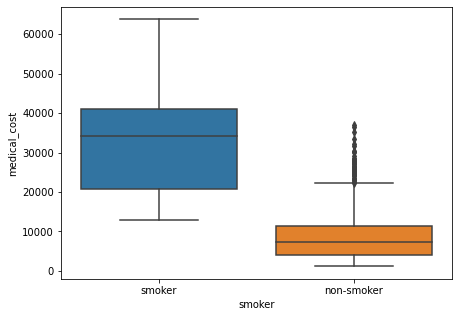

In [20]:
plt.figure(figsize = (7,5))
sns.boxplot(x = 'smoker', y = 'medical_cost', data = df)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

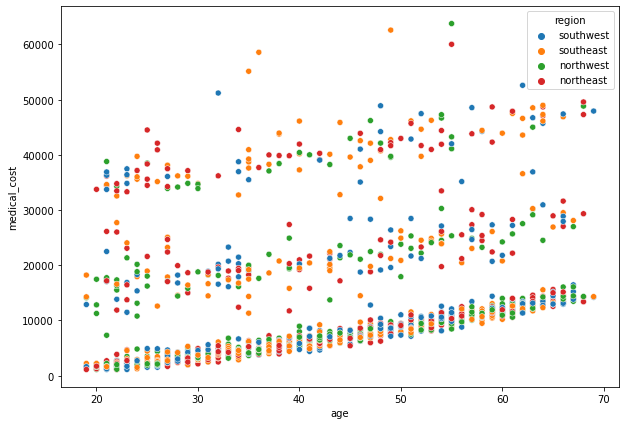

In [21]:
plt.figure(figsize = (10,7))

sns.scatterplot('age', 'medical_cost', data = df, hue = 'region')

plt.show()

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
pd.get_dummies(df['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1295,0,0,0,1
1296,1,0,0,0
1297,0,0,1,0
1298,0,1,0,0


In [24]:
# Using one hot encoder

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
onehotencoder = OneHotEncoder()
encoded = onehotencoder.fit_transform(df['region'].values.reshape(-1,1)).toarray()
df_e = pd.DataFrame(encoded, columns = ['southwest','southeast','northwest','northeast'])
df_e.head()

,southwest,southeast,northwest,northeast
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
labelencoder = LabelEncoder()

df['smoker_label'] = labelencoder.fit_transform(df['smoker'])

df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# Method 1

enc = df.groupby(['gender']).size()
enc

gender
F    657
M    643
dtype: int64

In [30]:
enc = enc/len(df)
enc

gender
F    0.505385
M    0.494615
dtype: float64

In [31]:
df['freq_gender'] = df['gender'].map(enc)
df['freq_gender'] 

0       0.494615
1       0.505385
2       0.505385
3       0.505385
4       0.505385
          ...   
1295    0.505385
1296    0.494615
1297    0.494615
1298    0.494615
1299    0.494615
Name: freq_gender, Length: 1300, dtype: float64

In [32]:
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,freq_gender
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385


In [33]:
# Method 2

freq =  df['gender'].value_counts(normalize = True)
df['gender_1'] = df['gender'].replace(freq)
df['gender_1']

0       0.494615
1       0.505385
2       0.505385
3       0.505385
4       0.505385
          ...   
1295    0.505385
1296    0.494615
1297    0.494615
1298    0.494615
1299    0.494615
Name: gender_1, Length: 1300, dtype: float64

In [34]:
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,freq_gender,gender_1
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,0.505385


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
df['smoker_label'] = df['smoker'].replace({'smoker' : 1, 'non-smoker' : 0})
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,freq_gender,gender_1
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,0.505385


In [36]:
pd.get_dummies(df['smoker'], drop_first = True)

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1295,0
1296,0
1297,0
1298,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
print('Mean: ', df['bmi'].mean())

print('Variance: ', df['bmi'].var())

Mean:  31.581396153846132
Variance:  40.40492851499686


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
std_scale = StandardScaler()

bmi_std = std_scale.fit_transform(df[['bmi']])

print('Mean: ', bmi_std.mean())

print('Variance: ', bmi_std.var())

Mean:  -4.837156316520682e-16
Variance:  1.0000000000000002


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
print('Min: ', df['age'].min())
print('Max: ', df['age'].max())

Min:  19
Max:  69


In [42]:
from sklearn.preprocessing import MinMaxScalar

ImportError: cannot import name 'MinMaxScalar' from 'sklearn.preprocessing' (C:\Users\prana\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [43]:
min_max = MinMaxScalar()

age_minmaxscaled = min_max.fit_transform(df[['age']])

NameError: name 'MinMaxScalar' is not defined

In [44]:
print('Min: ', age_minmaxscaled.min())

print('Max: ', age_minmaxscaled.max())

NameError: name 'age_minmaxscaled' is not defined

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
df['medical_cost'].skew()

1.5341854555059415

Skewness is positive

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [46]:
df['medical_cost_exp'] = np.exp(df['medical_cost_log'])

KeyError: 'medical_cost_log'

In [57]:
df[['medical_cost', 'medical_cost_log', 'medical_cost_exp']].describe()

KeyError: "['medical_cost_log', 'medical_cost_exp'] not in index"